# ARMA processes

$(X_t)_{t\in \Z}$ is an ARMA($p, q$) process if it satisfies

$$ X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}, \qquad \epsilon_t \sim \mathrm{WN}(0, \sigma^2)$$

Under certain conditions on the AR coefficients $\phi_1, \ldots, \phi_p$, there exists a solution $X_t$ which is stationary and can be written as an (infinite) linear combination of $\epsilon_{t-j}$ with $j\ge 0$ (causal). We will mostly restrict attention to stationary and causal processes.

As an example, we plot the parameter restrictions on $\phi_1, \phi_2$ for which any ARMA(2, $q$) model has a stationary causal solution:

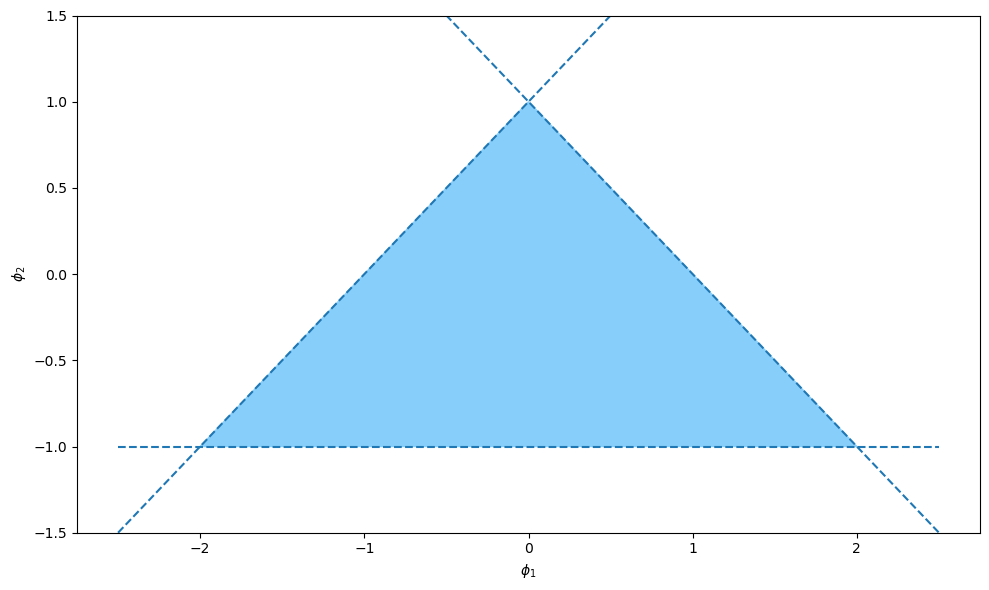

In [1]:
import math as mth
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

phi1 = np.linspace(-2.5, 2.5, 51)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(phi1, 1 - phi1, color = "tab:blue", linestyle = "--")
ax.plot(phi1, 1 + phi1, color = "tab:blue", linestyle = "--")
ax.hlines(-1, -2.5, 2.5, color = "tab:blue", linestyle = "--")
ax.fill([-2, 0, 2], [-1, 1, -1], color = "lightskyblue")
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel(r"$\phi_1$")
ax.set_ylabel(r"$\phi_2$")
fig.tight_layout()
plt.show()


ARMA($p, q$) models of this type provide a rich class of models for stationary (univariate) time series. They are not suitable to model every stationary time series, but do include time series with a rich variety of, for example, autocovariance functions.

Some examples of the ACF and PACF of ARMA($p, q$) processes are given below.

In [2]:
def plot_ts(X, figsize = (12, 3)):
    n = len(X)
    fig, ax = plt.subplots(figsize = figsize)
    ax.plot(range(n), X)
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$X_t$")
    fig.tight_layout()
    plt.show()
    

def plot_acf_pacf(arma, nlags = 20, figsize = (12, 6)):

    fig, axes = plt.subplots(2, 1, figsize = figsize)
    x = range(nlags)
    acf = arma.acf(nlags)
    pacf = arma.pacf(nlags)
    titles = ["ACF", "PACF"]
    for (i, cf) in enumerate([acf, pacf]):
        axes[i].scatter(x, cf)
        axes[i].vlines(x, 0, cf, color = "tab:blue")
        axes[i].hlines(0, 0, nlags, color = "lightskyblue", alpha  =0.5)
        axes[i].set_xlim(-0.5, nlags + 0.5)
        axes[i].set_title(titles[i])
        axes[i].set_xticks([i * 4 for i in range(mth.floor(nlags/4) + 1)])
    
    fig.tight_layout()
    plt.show()

In [2]:
n = 400
burnin = 400

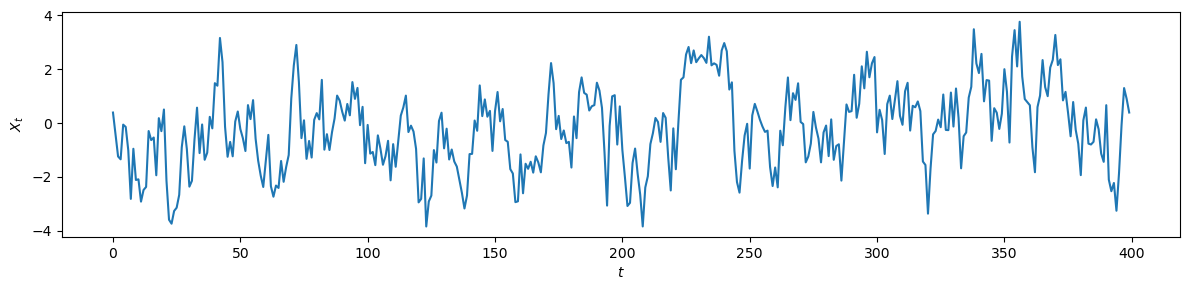

In [9]:
# AR(1), \phi = [0.7]

ar1 = sm.tsa.ArmaProcess(ar = [1.0, -0.7], ma = [1.0])
X = ar1.generate_sample(n + burnin)
plot_ts(X[burnin:])


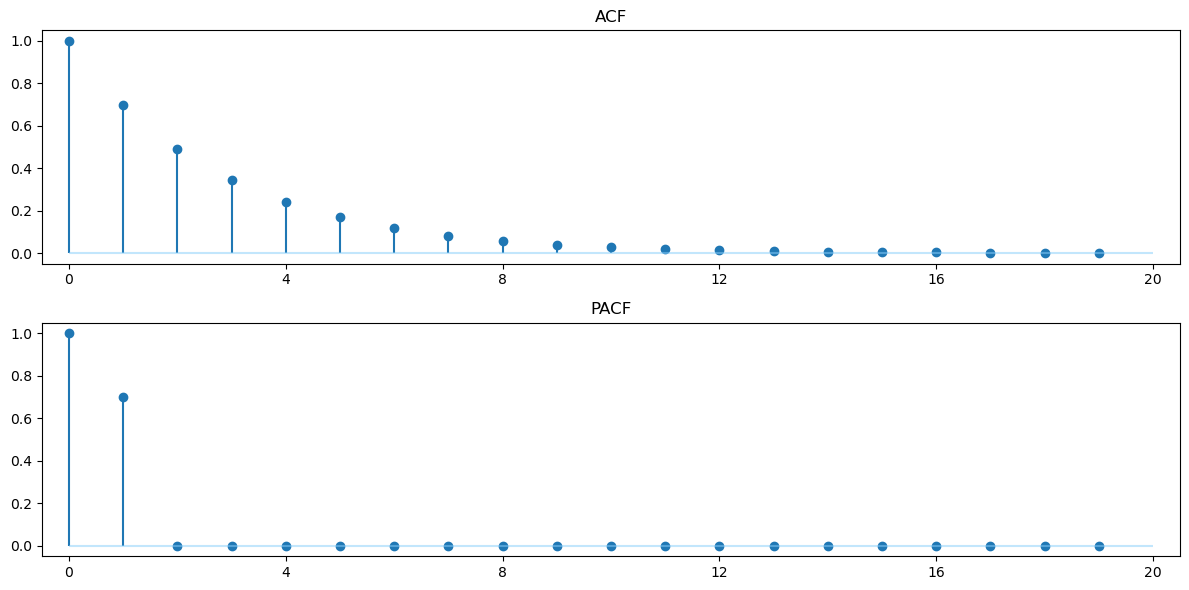

In [8]:
plot_acf_pacf(ar1)

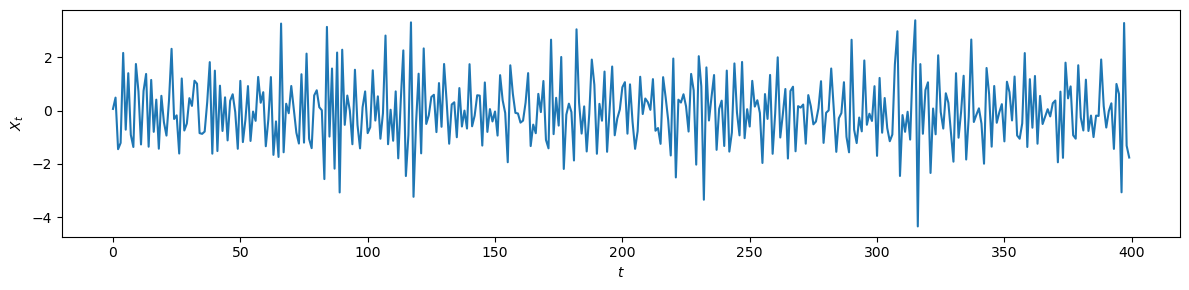

In [10]:
# MA(1), theta = [-0.8]
ma1 = sm.tsa.ArmaProcess(ar = [1.0], ma = [1.0, -0.8])
X = ma1.generate_sample(n + burnin)
plot_ts(X[burnin:])

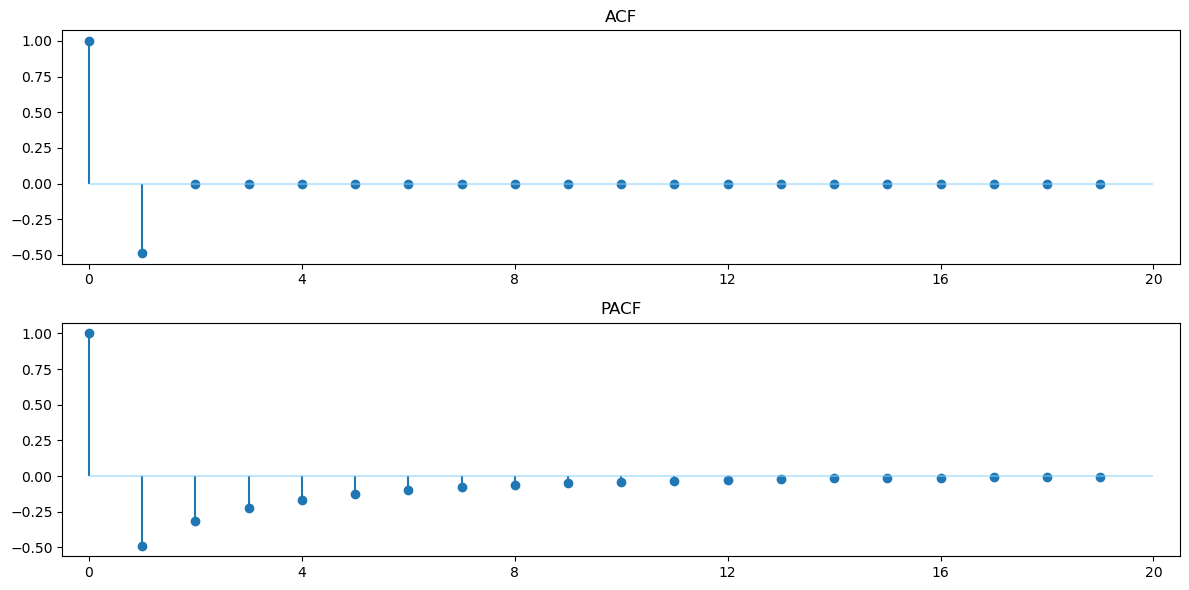

In [11]:
plot_acf_pacf(ma1)

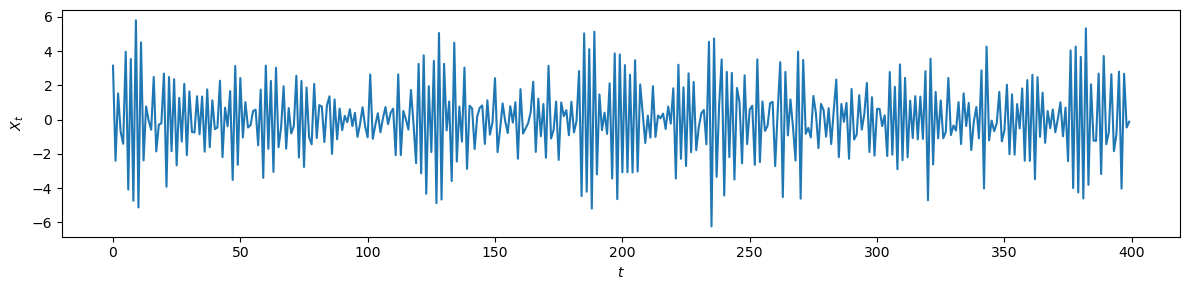

In [12]:
# ARMA(1, 1), \phi = [0.7], \theta = [-0.8]

arma11 = sm.tsa.ArmaProcess(ar = [1.0, 0.7], ma = [1.0, -0.8])
X = arma11.generate_sample(n + burnin)
plot_ts(X[burnin:])

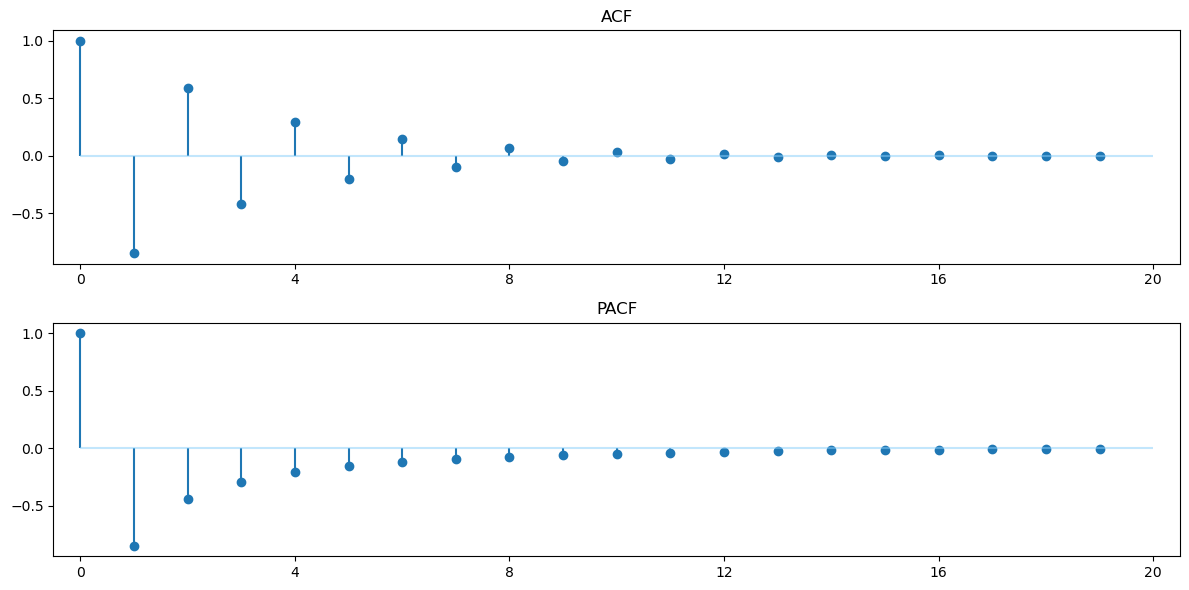

In [13]:
plot_acf_pacf(arma11, 20)

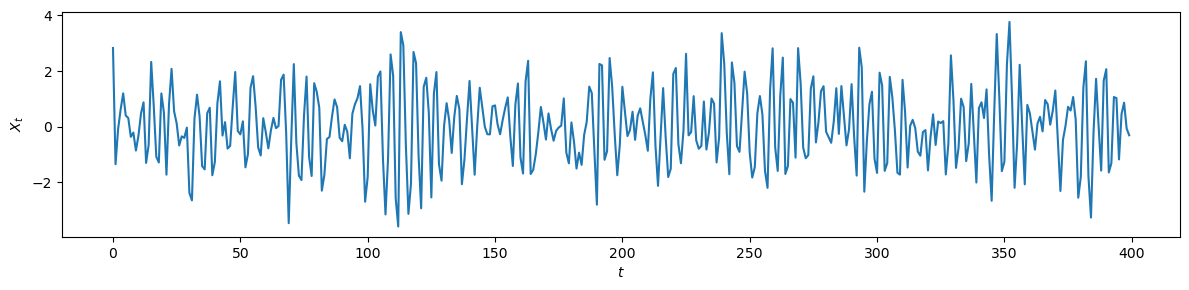

In [15]:
# AR(3), \phi = [0.3, -0.8, 0.1]

ar3 = sm.tsa.ArmaProcess(ar = [1.0, -0.3, 0.8, -0.1], ma = [1.0])
X = ar3.generate_sample(n + burnin)
plot_ts(X[burnin:])

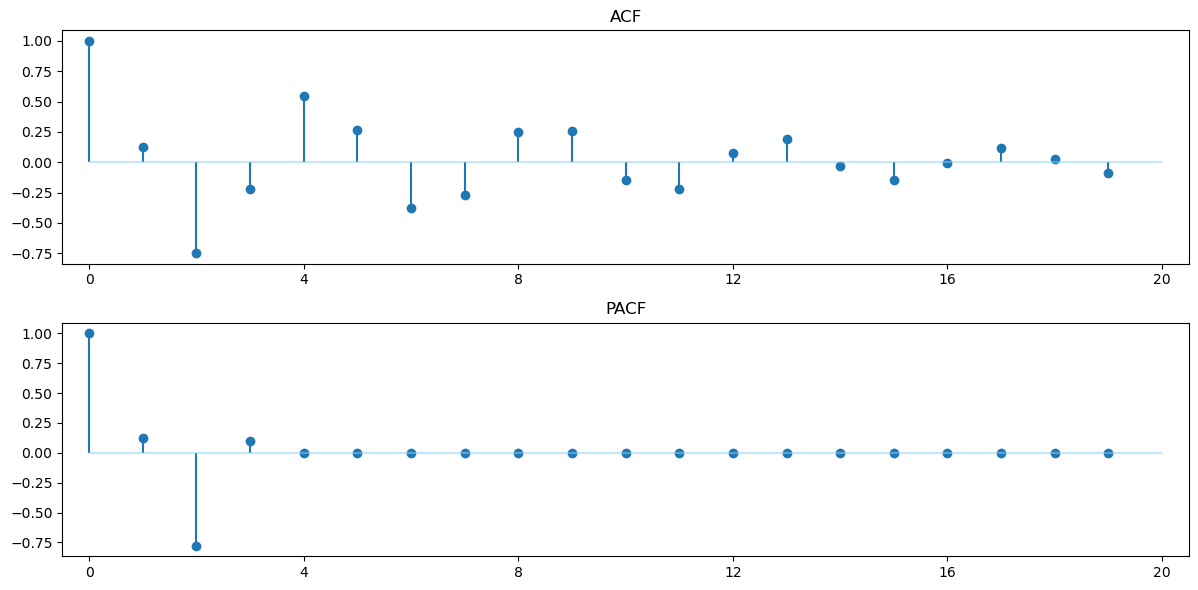

In [16]:
plot_acf_pacf(ar3, 20)

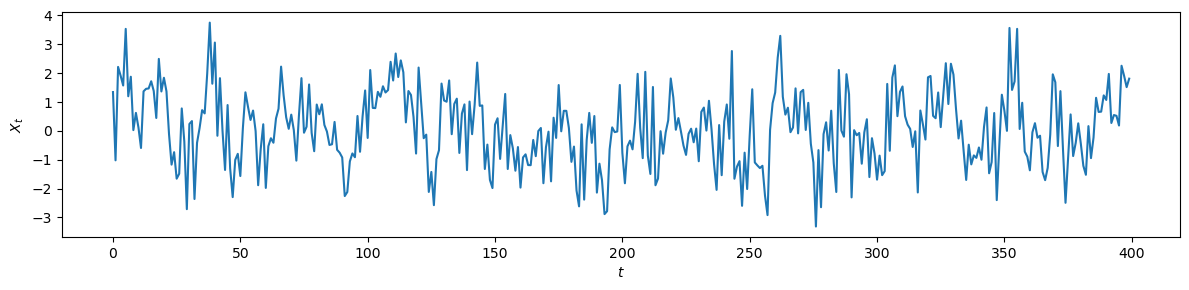

In [17]:
# MA(3), \theta = [0.2, 0.5, 0.8]

ma3 = sm.tsa.ArmaProcess(ar = [1.0], ma = [1.0, 0.2, 0.5, 0.8])
X = ma3.generate_sample(n + burnin)
plot_ts(X[burnin:])

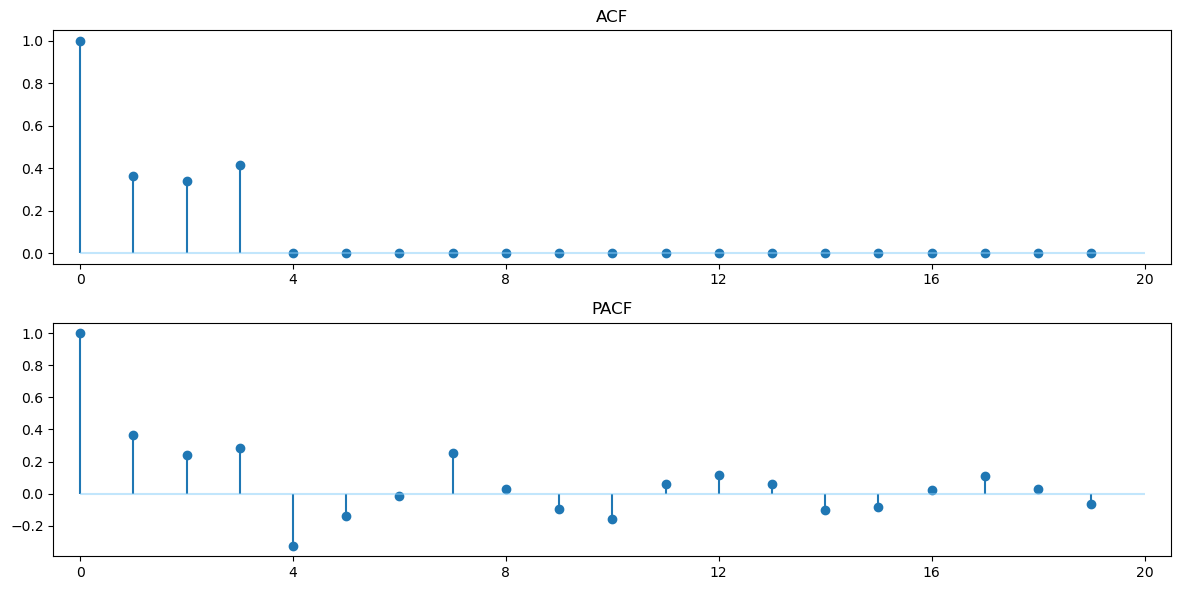

In [18]:
plot_acf_pacf(ma3, 20)


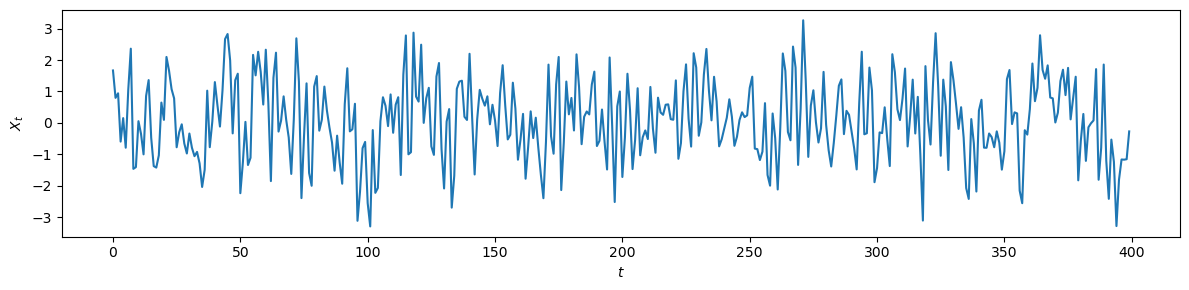

In [19]:
# ARMA(3, 3), phi = [0.3, -0.8, 0.1], \theta = [0.2, 0.5, 0.8]

arma33 = sm.tsa.ArmaProcess(ar = [1.0, -0.3, 0.8, -0.1], ma = [1.0, 0.2, 0.5, 0.8])
X = arma33.generate_sample(n + burnin)
plot_ts(X[burnin:])

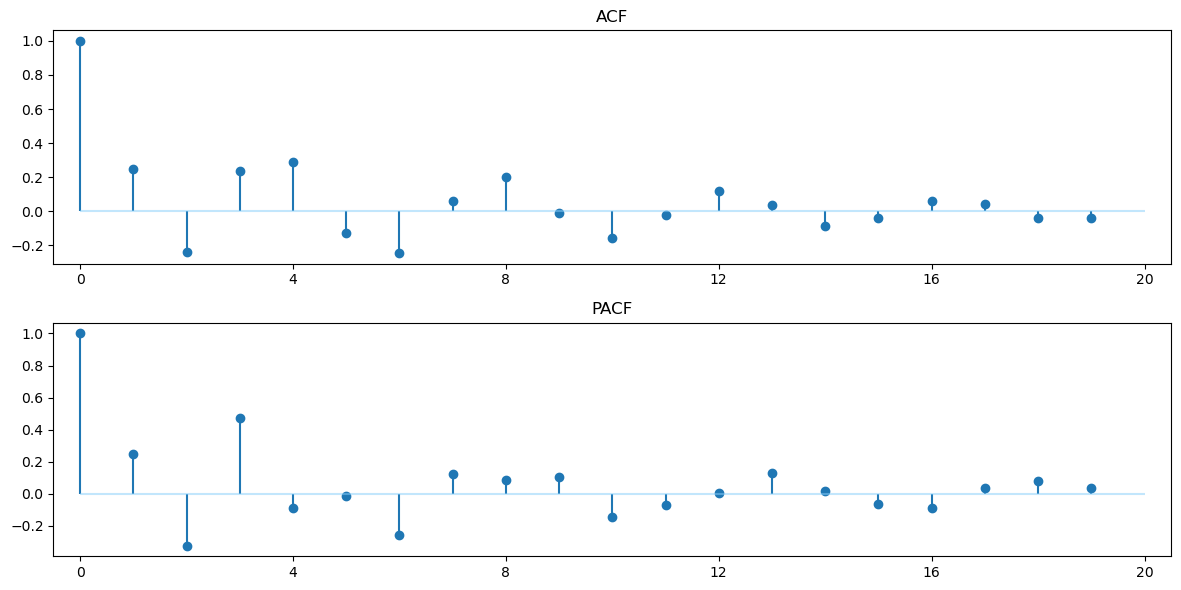

In [20]:
plot_acf_pacf(arma33)

Once we have an ARMA($p, q$) model it is also easy to forecast future values of the time series. 

Below we draw a realisation from the previous ARMA($3, 3$) model and forecast the next value based on based on the estimated autocovariances.

In [478]:
np.random.seed(4532344)
burn_in = 400
n = 400

X = arma33.generate_sample(burn_in + n)
X = X[burn_in:burn_in+n]

m = 21
acvf = sm.tsa.acovf(X, nlag = m)
theta, sigma2 = sm.tsa.stattools.innovations_algo(acvf, n)
u = sm.tsa.stattools.innovations_filter(X, theta)
X_fcst_est = np.dot(theta[n-1, :], u[::-1][0:m])

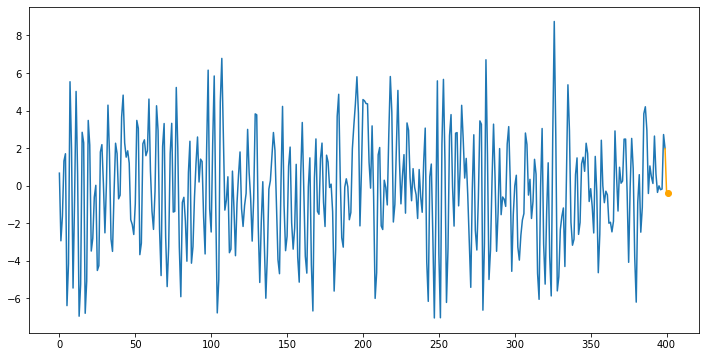

In [479]:
fig, ax = plt.subplots(figsize= (12, 6))
ax.plot(range(n), X)
ax.scatter(np.array([n+1]), np.array([X_fcst_est]), color = "orange")
ax.plot(range(n+1), np.concatenate((np.repeat(np.nan, n-1), np.array([X[n-1], X_fcst_est]))), color = "orange")
plt.show()

# ARMA lag order selection & estimation

As seen in the plots above, for AR and MA models, the ACF and PACF plots can reveal appropriate choices for the lag orders (i.e. $p$ and $q$).

The plots above were theoretical ACF and PACF plots. The ACF and PACF can also be estimated given a time series. This is demonstrated below using an example time series of Norwegian GDP growth 

In [3]:
import pandas as pd

In [29]:
qdf = pd.read_csv(
    "https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/namq_10_gdp.tsv.gz",
     sep=r'\,|\t',
     engine='python'
).rename(
    columns={'geo\\time':'geo'}
    ).query(
        "s_adj == 'SCA' & geo == 'NO' & (unit == 'CLV15_MNAC' | unit == 'CLV_PCH_SM') & na_item == 'B1GQ'"
        ).drop(
            ["s_adj", "na_item", "geo"],
             axis=1
             )

qdf = pd.melt(
    qdf,
    id_vars=['unit']
    ).rename(
        columns = {"variable":"date"}
        ).pivot(
            index = "date",
            columns = "unit",
            values = "value"
            )

In [30]:
qdf.index = pd.PeriodIndex(qdf.index.str.strip(), freq = "Q").to_timestamp()
qdf_ind = (qdf.index >= pd.to_datetime("1997-01-01")) & (qdf.index <= pd.to_datetime("2023-06-30"))

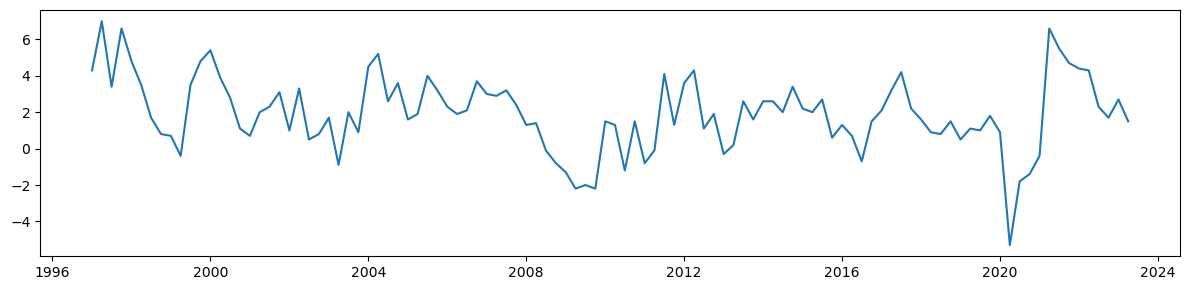

In [31]:
fig, ax = plt.subplots(figsize = (12, 3))
X = pd.to_numeric(qdf["CLV_PCH_SM"][qdf_ind], errors= "coerce")
ax.plot(qdf.index[qdf_ind], X, label = "GDP (% change)")
fig.tight_layout()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/py310/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


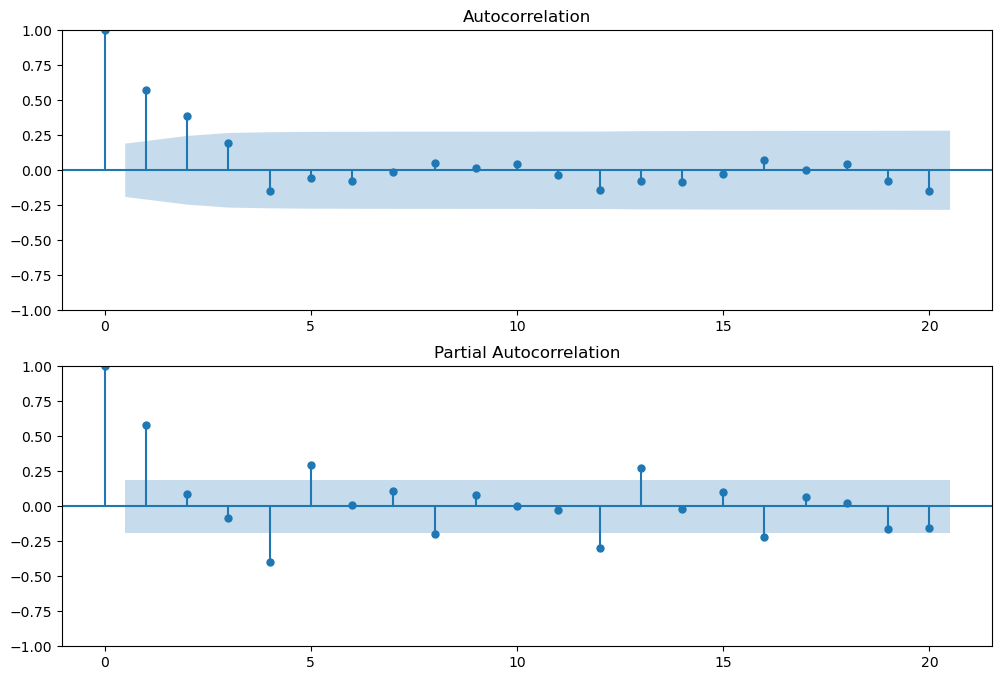

In [32]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X, lags=20, ax=ax2)

Another way of performing lag order selection is the use of -- as discussed in the lectures -- information criteria. 

This involves estimating a collection of candidate models and comparing a measure of their fit whilst penalising the number of parameters. 

Such model selection can be performed straightforwardly for ARMA models using statsmodels

In [33]:
sm.tsa.arma_order_select_ic(X, ic = ["aic", "bic"],
                             max_ar = 4, max_ma = 6,
                               fit_kw = {"method" : "innovations_mle"}
                               )


{'aic':             0           1           2           3           4           5  \
 0  455.136475  424.556668  415.570348  374.584638  371.237888  372.707720   
 1  414.379404  415.585078  406.660159  372.466389  373.605799  369.172738   
 2  415.199164  417.336331  405.481533  371.447646  375.294270  376.309352   
 3  416.329299  398.243049  388.367247  372.081138  366.593024  368.790389   
 4  401.660807  381.203946  382.888576  373.660035  375.007136  368.548834   
 
             6  
 0  371.819307  
 1  366.828834  
 2  369.121324  
 3  369.629826  
 4  371.614885  ,
 'bic':             0           1           2           3           4           5  \
 0  460.463353  432.546985  426.224104  387.901834  387.218523  391.351794   
 1  422.369721  426.238834  419.977354  388.447023  392.249873  390.480251   
 2  425.852921  430.653527  421.462167  390.091719  396.601782  400.280304   
 3  429.646494  414.223684  407.011321  393.388651  390.563976  395.424780   
 4  417.641442  399.848

The BIC penalises the number of parameters more strongly and so will generally favour models with fewer parameters. Here we will proceed with the ARMA(0, 4) = MA(4) model the BIC selects. 

In [40]:
# Estimation of ARMA(0, 4)  = ARIMA(0,0,4) = MA(4)

ma4 = sm.tsa.ARIMA(X, order = (0,0,4)).fit(method = "innovations_mle")
ma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             CLV_PCH_SM   No. Observations:                  106
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -179.619
Date:                Mon, 30 Oct 2023   AIC                            371.238
Time:                        10:26:28   BIC                            387.219
Sample:                    01-01-1997   HQIC                           377.715
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9399      0.394      4.921      0.000       1.167       2.713
ma.L1          0.7219      7.503      0.096      0.923     -13.983      15.427
ma.L2          0.6563      2.123      0.309      0.757      -3.505       4.818
ma.L3          0.6905      7.014      0.098      0.922     -13.056      14.437
ma.L4         -0.2435      1.852     -0.132      0.895      -3.874       3.386
sigma2         1.6268     12.299      0.132      0.895     -22.478      25.732
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                84.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.93
Prob(H) (two-sided):                  0.77   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

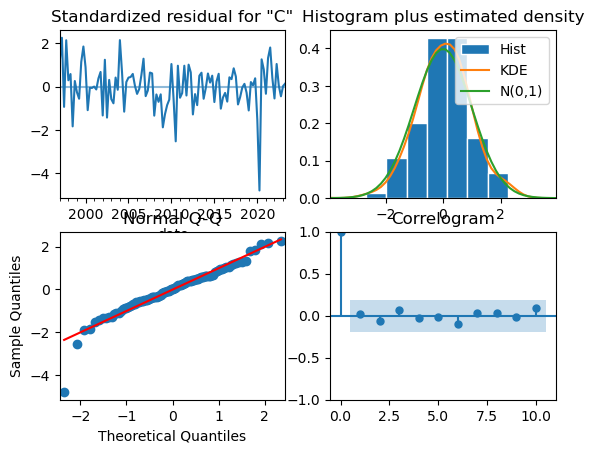

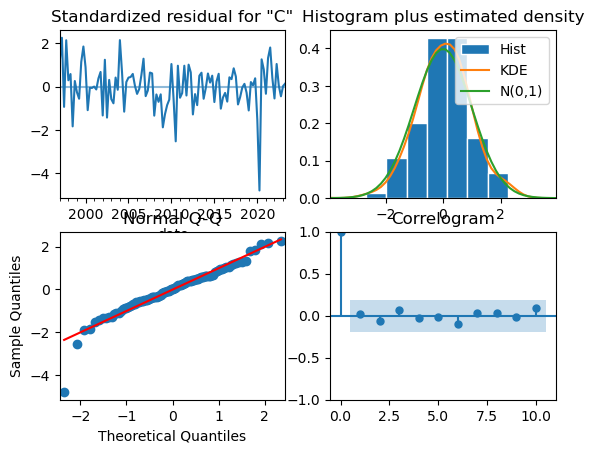

In [45]:
ma4.plot_diagnostics()

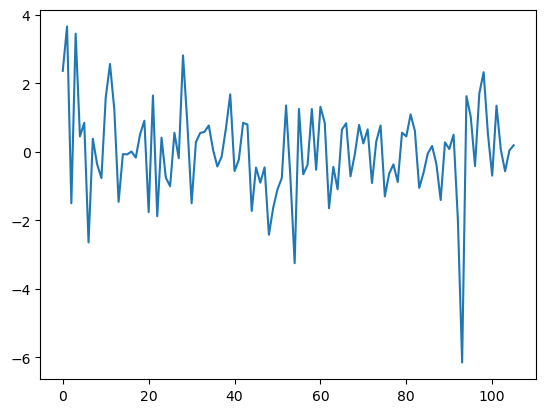

In [49]:
fig, ax = plt.subplots()
ax.plot(range(len(ma4.resid)), ma4.resid)
plt.show()

In [35]:
# We can directly use this to forecast the next observation:

h=8
# fcst = ma4.get_forecast(steps = h)                            # Out of sample forecast
fcst = ma4.get_prediction(end = X.last_valid_index() + h * X.index.freq)       # In sample fit & out of sample forecast

In [41]:
df = qdf.loc[:, ["CLV_PCH_SM"]][qdf_ind]
df = pd.concat([df, fcst.predicted_mean, fcst.conf_int()], axis = 1)
df.rename(columns={"CLV_PCH_SM" : "GDP growth",
                    "lower CLV_PCH_SM" : "lower ci",
                    "upper CLV_PCH_SM" : "upper ci"}, inplace=True)
df
df["GDP growth"] = df["GDP growth"].map(float)

In [42]:
df

,GDP growth,predicted_mean,lower ci,upper ci
1997-01-01,4.3,1.939880,-2.003187,5.882947
1997-04-01,7.0,3.344478,0.175737,6.513218
1997-07-01,3.4,4.905258,1.744462,8.066054
1997-10-01,6.6,3.152983,0.004387,6.301578
1998-01-01,4.8,4.353000,1.378430,7.327570
...,...,...,...,...
2024-04-01,NaN,1.894639,-2.001569,5.790848
2024-07-01,NaN,1.939880,-2.003187,5.882947
2024-10-01,NaN,1.939880,-2.003187,5.882947
2025-01-01,NaN,1.939880,-2.003187,5.882947


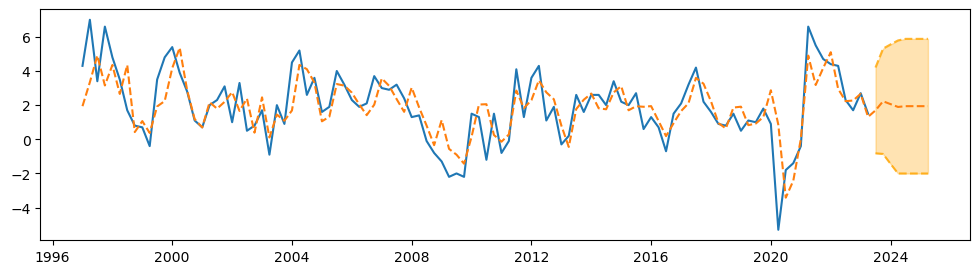

In [44]:
CI_insample = False    # change to True to have CI plotted over whole sample

if CI_insample:
    CI_ind = df.index
else:
    CI_ind = df.index[-h:]



fig, ax = plt.subplots(figsize = (12, 3))
ax.plot(df.index, df.iloc[:, 0])
ax.plot(df.index, df.iloc[:, 1], linestyle = "--")

ax.plot(CI_ind, df.loc[CI_ind, "lower ci"], color = "orange", alpha = 0.8, linestyle = "--")
ax.plot(CI_ind, df.loc[CI_ind, "upper ci"], color = "orange", alpha = 0.8, linestyle = "--")
ax.fill_between(CI_ind, df.loc[CI_ind, "lower ci"], df.loc[CI_ind, "upper ci"], color = "orange", alpha = 0.3)
plt.show()